import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',100)
pd.set_option('display.width', 1000)




#reading data

df_crime= pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD__Part_I_Crime_2011_to_Present.csv") #Reading the dataset in a dataframe using Pandas

#Here df is the dataframeset
#To see the info of the data frame 

#reading data
print("==================================================================")
feature_set = pd.read_csv("/Users/pallavi/Downloads/CleanCrime.csv") #Reading the dataset in a dataframe using Pandas
#Here df is the dataframeset
print(feature_set.info())

#To see the info of the data frame 

df_Personnel= pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD_Police_Personnel.csv") #Reading the dataset in a dataframe using Pandas

df_Shooting_Victims=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/Rochester_Shooting_Victims.csv")

df_homicides=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RochesterNY_Homicides.csv")

print(df_Personnel.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78416 entries, 0 to 78415
Data columns (total 48 columns):
X                                     77960 non-null float64
Y                                     77960 non-null float64
OBJECTID                              78416 non-null int64
Geocode_Address                       77960 non-null object
Geocode_Street                        78416 non-null object
OccurredFrom_Date_Year                78416 non-null int64
OccurredFrom_Date_Month               78416 non-null int64
OccurredFrom_Time                     78416 non-null int64
Shift                                 78416 non-null object
CleanedTime1                          78416 non-null object
Date                                  78416 non-null object
OccurredFrom_Timestamp                78416 non-null object
OccurredThrough_Date_Year             78416 non-null int64
OccurredThrough_Date_Month            78416 non-null int64
OccurredThrough_Time                  78416 non-null in

In [26]:
# print('==============================RPD-Personnel=====================================')
# df_Personnel.info()
# print('==============================RPD-Shooting-Victims==============================')
# df_Shooting_Victims.info()
# print('==============================RPD-Homicides=====================================')
# df_homicides.info()

In [20]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
count=0;
for index, row in feature_set.iterrows():
    if (pd.isnull(row['Geocode_Address'] )):
         location = geolocator.geocode(row['Geocode_Street'])
         if location is not None:
             latitude = location.latitude
             longitude= location.longitude
             feature_set.set_value(index,'X',latitude)
             feature_set.set_value(index,'Y',longitude)
             feature_set.set_value(index,'Geocode_Address',location)
             print('Street',row['Geocode_Street'])


/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


Street 222 ARBORWOOD LA  
Street 275 COMMERCE DR  
Street 1 BAUSCH & LOMB PL  
Street 1 BAUSCH & LOMB PL  
Street 1 BAUSCH & LOMB PL  
Street 70 G RAMONA PARK
Street 1290 A EMERSON ST
Street 708 B JOSEPH AVE
Street 0 UNKNOWN  
Street 2121 WHITNEY RD E  
Street 157 DAFFODIL TRAIL  
Street 120 A STENSON ST
Street 77 REAR PRIMROSE ST
Street 14 REAR WOODFORD ST
Street 44 B MANOR PKWY
Street 535 WINTON N ROAD
Street 140 C GREEN KNOLLS DR
Street 142 NORTON VILLAGE LA  
Street 905 C SOUTH AVE
Street 56 D DODGE ST
Street 56 D DODGE ST
Street 49 B BENNINGTON DR
Street 49 B BENNINGTON DR
Street 95 G MARIETTA ST
Street 46 B DODGE ST
Street 84 C DODGE ST
Street 480 WINTON N ROAD
Street 87 VAN ANDEN ST  
Street 98 B GREEN KNOLLS DR
Street 17 A MANOR PKWY
Street 42 D MANOR PKWY
Street 147 B ACKERMAN ST
Street 1 JAMES ST  
Street 58 C MANOR PKWY
Street 76 A DODGE ST
Street 23 A ALEXANDER ST
Street 31 B PLOVER ST
Street 755 WINTON N ROAD
Street 44 B WELD ST
Street 525 N WINTON ROAD
Street 663 WINTON N

In [21]:
print("Check the missing values after replaceing the longitude and latitude: ")
pd.isnull(feature_set).sum()


Check the missing values after replaceing the longitude and latitude: 


X                                     151
Y                                     151
OBJECTID                                0
Geocode_Address                       151
Geocode_Street                          0
OccurredFrom_Date_Year                  0
OccurredFrom_Date_Month                 0
OccurredFrom_Time                       0
Shift                                   0
CleanedTime1                            0
Date                                    0
OccurredFrom_Timestamp                  0
OccurredThrough_Date_Year               0
OccurredThrough_Date_Month              0
OccurredThrough_Time                    0
Shift.1                                 0
CleanedTime2                            0
Duration of Crime                       0
OccurredThrough_Timestamp               0
Week_Name                               0
Reported_Date_Year                      0
Reported_Date_Month                     0
Reported_Time                           0
ReportedTime                      

In [24]:
feature_set[feature_set.Geocode_Street!='UNKNOWN']
feature_set=feature_set.dropna(axis=0)
print(feature_set.shape)


# print("Check the missing values after dropping the longitude and latitude: ")
# pd.isnull(feature_range).sum()

(77952, 48)


In [25]:
print(feature_set.head(5))

            X          Y  OBJECTID                           Geocode_Address      Geocode_Street  OccurredFrom_Date_Year  OccurredFrom_Date_Month  OccurredFrom_Time         Shift CleanedTime1        Date    OccurredFrom_Timestamp  OccurredThrough_Date_Year  OccurredThrough_Date_Month  OccurredThrough_Time       Shift.1 CleanedTime2 Duration of Crime OccurredThrough_Timestamp Week_Name  Reported_Date_Year  Reported_Date_Month  Reported_Time ReportedTime        Reported_Timestamp Duration between report & occurred  Address_StreetFull Address_City Address_State Patrol_Beat Patrol_Section                Case_Status Statute_Title  Statute_Section Statute_Subsection  Statute_Degree Statute_Class Statute_Category        Statute_Text                                Statute_Description  Statute_CrimeCategory Statute_Attempted       Weapon_Description                   Larceny_Type       Location_Type  Geo_Beat Geo_Section  Geo_Section_Num
13 -77.641021  43.145561        14  153 Wellington Ave, R

In [26]:
# feature_set.Location_Type.astype("int", categories='Location_Type').cat.codes 
# print(feature_set.dtypes)
obj_feature_set = feature_set.select_dtypes(include=['object']).copy()
#print(obj_feature_set.head(2))

print(obj_feature_set["Location_Type"].value_counts())
# print(obj_feature_set["Week_Name"].value_counts())
# print(obj_feature_set["Weapon_Description"].value_counts())

cleanup_nums = {"Location_Type": {"Single Family Home": 1, 
                                 "Street": 2, 
                                "Multiple Dwelling": 3, 
                                "Other Outside Location":4,
                                "Parking Lot":5, 
                                "Grocery/Supermarket": 6, 
                                "Yard":7, 
                                "Hospital":8,
                                "Department/Discount Store":9,
                                "Other Residential":10,
                                "Garage/Shed":11,
                                "School":12,
                                "Other Retail Store":13,
                                "Gas Station":14,
                                "Other Building":15,
                                "Variety/Convenience Store":16,
                                "College":17,
                                "Yard":18,
                                "Restaurant":19,
                                "Bar":20,
                                "Other Public Access Building":21,
                                "Other Commercial Service Location":22,
                                "Other Business Office":23,
                                "Residential Facility":24,
                                "Drug Store":25,
                                "Parking Garage":26,
                                "* No Location Scene Specified *":27,
                                "Church":28,
                                "Park/Playground":29,
                                "Auto Shop":30,
                                "Financial Institution":31,
                                "Unknown":32,
                                "Public Transit Vehicle":33,
                                "Hotel/Motel":34,
                                "Construction Site":35,
                                "Clothing Store":36,
                                "Professional Office":37,
                                "Barber/Beauty Shop":38,
                                "Government Office":39,
                                "Factory/Mill/Plant":40,
                                "Transit Facility":41,
                                "Factory/Mill/Plant":42,
                                "Doctor's Office":43,
                                "Dry Cleaners/Laundry":44,
                                "Cemetery":45,
                                "Liquor Store":46,
                                "Buy/Sell/Trade Shop":47,
                                "Amusement Center":48,
                                "***":49,
                                "Field/Woods":50,
                                "Rental Storage Facility":51,
                                "Shopping Mall":52,
                                "Field/Woods":53,
                                "Rental Storage Facility":54,
                                "Shopping Mall":55,
                                "Not Reported":56,
                                "Lake/Waterway":57,
                                "Not Reported":58,
                                "Jewelry Store":58,
                                "Sporting Goods":58,
                                "Jail/Prison":59,
                                 "Auto Sales Lot":60}}
# feature_set['Location_Type'] =  feature_set['Location_Type'].astype('int64')

obj_feature_set.replace(cleanup_nums, inplace=True)
# print(obj_feature_set["Statute_Category"].value_counts())
# print(obj_feature_set["Statute_Class"].value_counts())
# print(obj_feature_set["Shift"].value_counts())

cleanup_attribute={"Statute_Category":     {"M": 1, "F": 2},
                    "Statute_Class":       {"A": 1, "B": 2, "C": 3, "D":4,"E":5},
                     "Shift":{"NightShift":1,"MorningShift":2,"AfternoonShift":3},
                     "Week_Name":{"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7},
                    "Weapon_Description":{  "* No Weapon Specified *":100,
                                            "Knife/Cutting Instrument":200,
                                            "Firearm":300,
                                            "Semiautomatic Handgun":400,
                                            "Personal Weapons":500,
                                            "Blunt Object":600,
                                            "Other Weapon":700,
                                            "Revolver, Derringer, or Single-shot Pistol":800,
                                            "Not Reported":900,
                                            "Shotgun":1000,
                                            "Unknown":1100,
                                            "Physical Force":1200,
                                            "Motor Vehicle":1300,
                                            "Imitation Firearm":1400,
                                            "Simulated Firearm":1500,
                                            "Semiautomatic Rifle":1600,
                                            "Fire/Incendiary Device":1700,
                                            "Single Shot, Pump Action, or Bolt Action Rifle":1800,
                                            "Fully Automatic Handgun or Submachine Gun":1900,
                                            "None/Not Applicable":2000,
                                            "Fully Automatic Rifle or Machine Gun":2100,
                                            "Explosives":2200,
                                            "Poison":2300,
                                            "Drug/Narcotics/Sleeping Pills":2400}
}

obj_feature_set.replace(cleanup_attribute, inplace=True)

obj_feature_set=obj_feature_set.drop(['Shift.1'],axis=1)
obj_feature_set=obj_feature_set.drop(['CleanedTime2'],axis=1)
obj_feature_set.head()





Single Family Home                   13558
Street                               12812
Multiple Dwelling                     9947
Other Outside Location                7909
Parking Lot                           6802
Grocery/Supermarket                   3701
Yard                                  2782
Hospital                              1427
Department/Discount Store             1362
Other Residential                     1269
Garage/Shed                           1250
School                                1133
Other Retail Store                    1011
Gas Station                            959
Other Building                         930
Variety/Convenience Store              920
College                                911
Restaurant                             805
Bar                                    731
Other Public Access Building           632
Other Commercial Service Location      593
Other Business Office                  549
Residential Facility                   502
Drug Store 

,Geocode_Address,Geocode_Street,Shift,CleanedTime1,Date,OccurredFrom_Timestamp,Duration of Crime,OccurredThrough_Timestamp,Week_Name,ReportedTime,Reported_Timestamp,Duration between report & occurred,Address_StreetFull,Address_City,Address_State,Patrol_Beat,Patrol_Section,Case_Status,Statute_Title,Statute_Subsection,Statute_Class,Statute_Category,Statute_Text,Statute_Description,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Section
13,"153 Wellington Ave, Rochester, NY, 14611",153 WELLINGTON AVE,2,10:00:00 AM,2016-04-26,2016-04-26T10:00:00.000Z,0:00,2016-05-10T10:00:00.000Z,2,6:10:00 AM,2016-06-04T16:20:00.000Z,20:10,153 WELLINGTON AVE,Rochester,NY,223,Genesee,Cleared by Arrest - Adult,PL,,1,1,Larceny,Petit Larceny ...,Completed,100,All Other Larcenies,1,Genesee
14,"103 Warner St, Rochester, NY, 14606",103 WARNER ST,1,6:17:00 PM,2016-04-18,2016-04-18T18:17:00.000Z,0:00,2016-04-18T18:17:00.000Z,1,7:10:00 AM,2016-04-18T22:17:00.000Z,12:53,103 WARNER ST,ROCHESTER,NY,261,Lake,Cleared by Arrest - Adult,PL,,4,2,Robbery,Robbery 3rd ...,Completed,900,* No Larceny Type Specified *,18,Lake
15,"57 Nellis Park, Rochester, NY, 14608",57 NELLIS PARK,2,9:00:00 AM,2016-06-03,2016-06-03T09:00:00.000Z,3:00,2016-06-03T12:00:00.000Z,5,8:10:00 AM,2016-06-03T16:20:00.000Z,20:10,57 NELLIS PARK,Rochester,NY,253,Genesee,Cleared by Arrest - Adult,PL,2,3,2,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,Completed,100,* No Larceny Type Specified *,1,Genesee
16,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,1,4:30:00 PM,2017-06-10,2017-06-10T16:30:00.000Z,0:14,2017-06-10T16:44:00.000Z,6,9:10:00 AM,2017-06-10T20:44:00.000Z,16:26,849 JEFFERSON AVE,Rochester,NY,253,Genesee,Cleared by Arrest - Adult,PL,1,1,1,Aggravated Assault,Menacing 2nd: Weapon ...,Completed,300,* No Larceny Type Specified *,2,Genesee
17,"849 Jefferson Ave, Rochester, NY, 14611",849 JEFFERSON AVE,1,11:00:00 PM,2016-07-01,2016-07-01T23:00:00.000Z,0:21,2016-07-01T23:21:00.000Z,5,10:10:00 AM,2016-07-02T03:00:00.000Z,10:49,849 JEFFERSON AVE,Rochester,NY,253,Genesee,Office,PL,1,3,2,Robbery,Robbery 2nd: Aided By Another ...,Completed,900,* No Larceny Type Specified *,2,Genesee


In [27]:
# plt.figure(figsize = (20, 6))
# ax = sns.barplot(x='Location_Type', y='Weapon_Description', data=obj_feature_set)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
# plt.xticks(rotation=45)
# plt.show()

obj_feature_set.dtypes

Geocode_Address                       object
Geocode_Street                        object
Shift                                  int64
CleanedTime1                          object
Date                                  object
OccurredFrom_Timestamp                object
Duration of Crime                     object
OccurredThrough_Timestamp             object
Week_Name                              int64
ReportedTime                          object
Reported_Timestamp                    object
Duration between report & occurred    object
Address_StreetFull                    object
Address_City                          object
Address_State                         object
Patrol_Beat                           object
Patrol_Section                        object
Case_Status                           object
Statute_Title                         object
Statute_Subsection                    object
Statute_Class                          int64
Statute_Category                       int64
Statute_Te

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


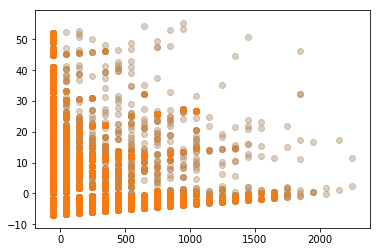

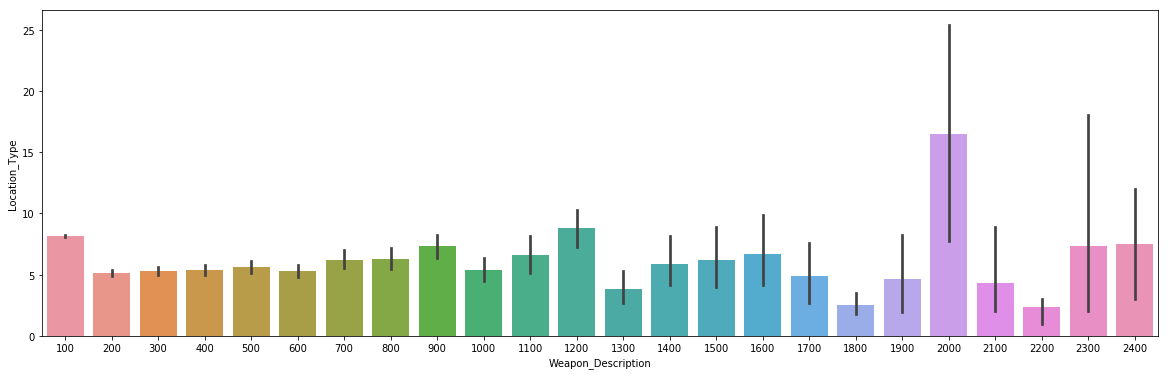

In [229]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='Weapon_Description', y='Location_Type', data=obj_feature_set)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


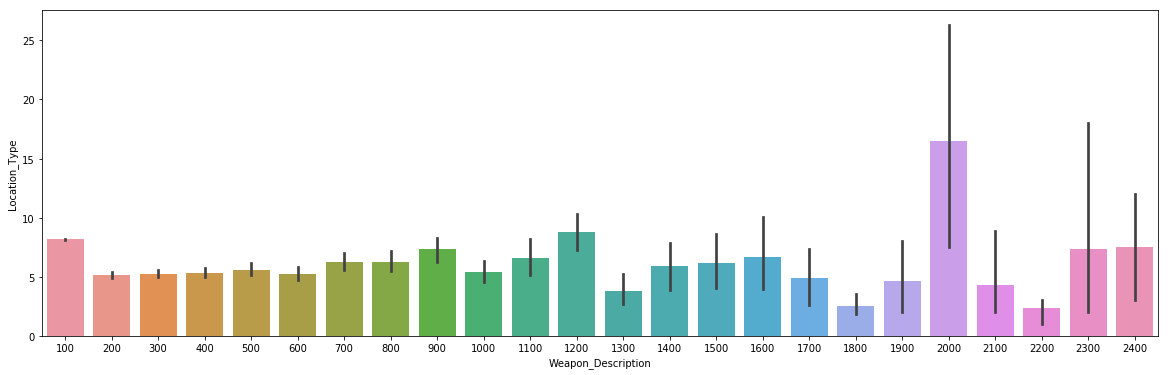

In [10]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='Weapon_Description', y='Location_Type', data=obj_feature_set)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


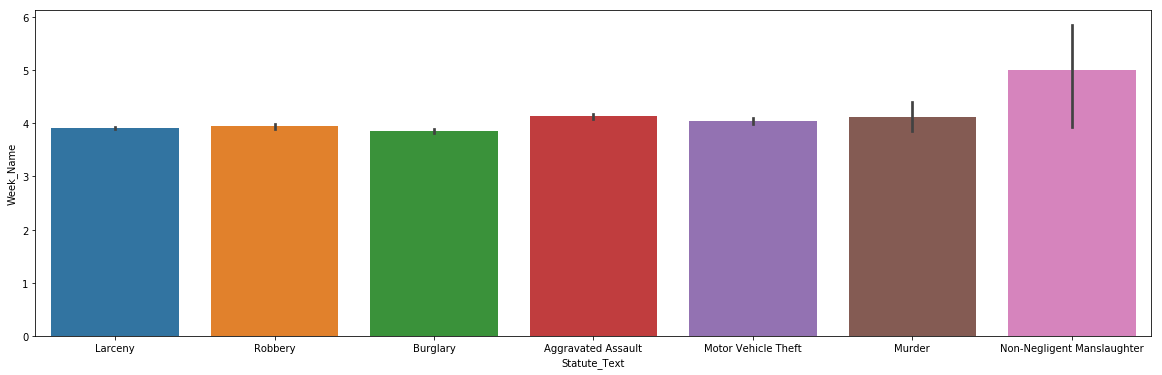

In [11]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='Statute_Text', y='Week_Name', data=obj_feature_set)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()

In [ ]:
Employee_Status=df_Personnel['Employee_Status']
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='Statute_Text', y='Employee_Status')
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()

In [ ]:
print(features["OccurredFrom_Date_Year"].value_counts())

In [124]:
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(feature_set['Statute_Text'])
print(target.shape)

features=pd.DataFrame()
features['X']=feature_set['X']
features['Y']=feature_set['Y']
features['OccurredFrom_Date_Year']=feature_set['OccurredFrom_Date_Year']
features['OccurredFrom_Date_Month']=feature_set['OccurredFrom_Date_Month']
features['Statute_CrimeCategory']=feature_set['Statute_CrimeCategory']
features['Shift']=obj_feature_set['Shift']
features['Weapon_Description']=obj_feature_set['Weapon_Description']
features['Week_Name']=obj_feature_set['Week_Name']
features['Location_Type']=obj_feature_set['Location_Type']
features['Statute_Category']=obj_feature_set['Statute_Category']
print(features.shape)

(77952, 1)
(77952, 6)


In [ ]:
from scipy.stats import chisquare
print(chisquare(features['Location_Type'], target))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors

knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
# pred =[{'X':-77.6457,'Y':43.13484,'OccurredFrom_Date_Year':2018,'OccurredFrom_Date_Month':5,
#         "Weapon_Description":300,"Week_Name":2,"Location_Type":2}] 
# df=df.values.reshape(-1,1)
# print(df.shape)
# pred = pd.DataFrame(pred.reshape(-1, 1))
# print(pred)
knn_predictions = knn.predict(x_test)
# print(knn_predictions)

# accuracy on X_test
# accuracy = knn.score(knn_predictions, y_test)
# print(accuracy*100)
print(classification_report(y_test,knn_predictions))

# print('Latitude','Longitude','Predictions')
# for index, row in x_test.iterrows():
#     for i in range(len(knn_predictions)):
#         print(row['X'], row['Y'],knn_predictions[i])

accuracy_KNN=accuracy_score(y_test,knn_predictions)
print(accuracy_KNN*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


                            precision    recall  f1-score   support

        Aggravated Assault       0.16      0.25      0.20      1636
                  Burglary       0.50      0.52      0.51      3822
                   Larceny       0.72      0.75      0.74     11567
       Motor Vehicle Theft       0.15      0.04      0.06      1077
                    Murder       0.00      0.00      0.00        49
Non-Negligent Manslaughter       0.00      0.00      0.00         4
                   Robbery       0.24      0.09      0.14      1333

               avg / total       0.56      0.58      0.57     19488

57.881773399


/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


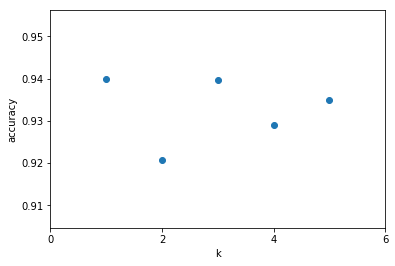

In [42]:
k_range = range(1, 6)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,2,4,6])
plt.show()

In [ ]:
target_names=['Larceny','Burglary','Aggravated Assault','Robbery','Motor Vehicle Theft ','Murder',
           'Non-Negligent Manslaughter']

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [128]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(x_train,y_train)
predictions_MLP = mlp.predict(x_test)
print(classification_report(y_test,predictions_MLP))

accuracy_MLP=accuracy_score(y_test,predictions_MLP)
print(accuracy_MLP*100)
print(predictions_MLP)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                            precision    recall  f1-score   support

        Aggravated Assault       0.41      0.01      0.02      1636
                  Burglary       0.52      0.68      0.59      3822
                   Larceny       0.69      0.87      0.77     11567
       Motor Vehicle Theft       0.00      0.00      0.00      1077
                    Murder       0.00      0.00      0.00        49
Non-Negligent Manslaughter       0.00      0.00      0.00         4
                   Robbery       0.19      0.00      0.01      1333

               avg / total       0.56      0.65      0.58     19488

64.9835796388
['Larceny' 'Burglary' 'Larceny' ..., 'Larceny' 'Burglary' 'Larceny']


/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pca = PCA(n_components=4)
cls = LogisticRegression() 

pipe = Pipeline([('pca', pca), ('logistic', clf)])
pipe.fit(x_train,y_train)
predictions_LR = pipe.predict(x_test)
accuracy_LR=accuracy_score(y_test,predictions)
print(accuracy*100)


(77952, 1)
(19488,)


In [130]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)
predictions_NB=clf.predict(x_test)
accuracy_NB=accuracy_score(y_test,predictions_NB)
print(accuracy_NB*100)

59.3544745484


/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
target = pd.DataFrame(feature_set['Statute_Text'])
print(target.shape)
# Put the target (housing value -- MEDV) in another DataFrame
print(target.shape)
features=pd.DataFrame()
features['X']=feature_set['X']
features['Y']=feature_set['Y']
features['OccurredFrom_Date_Month']=feature_set['OccurredFrom_Date_Month']
features['Statute_CrimeCategory']=feature_set['Statute_CrimeCategory']
features['Shift']=obj_feature_set['Shift']
features['Weapon_Description']=obj_feature_set['Weapon_Description']
features['Week_Name']=obj_feature_set['Week_Name']
features['Location_Type']=obj_feature_set['Location_Type']
features['Statute_Category']=obj_feature_set['Statute_Category']
features['Statute_Category']=obj_feature_set['Statute_Category']
features['OccurredFrom_Date_Year']=feature_set['OccurredFrom_Date_Year']
print(features.shape)
print(features.dtypes)


In [131]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(x_train,y_train)
predictions_SVM=clf.predict(x_test)
accuracy_SVM=accuracy_score(y_test,predictions_SVM)
print(accuracy_SVM*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 